In [18]:
pip instal numpy


ERROR: unknown command "instal" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np

In [30]:
import pickle
import os

data_path = "./"  

selected_subjects = ["S6", "S2", "S3", "S4", "S5"]

wesad_data = {}

for subject in selected_subjects:
    file_path = os.path.join(data_path, subject, f"{subject}.pkl")  

    if os.path.exists(file_path): 
        with open(file_path, 'rb') as file:
            subject_data = pickle.load(file, encoding='latin1')

        wesad_data[subject] = {
            "chest": subject_data["signal"]["chest"],  
            "wrist": subject_data["signal"]["wrist"],  
            "labels": subject_data["label"]  
        }

        print(f"✅ Loaded {subject}.pkl successfully.")
    else:
        print(f"❌ File {subject}.pkl not found at {file_path}. Check directory structure.")


✅ Loaded S6.pkl successfully.
✅ Loaded S2.pkl successfully.
✅ Loaded S3.pkl successfully.
✅ Loaded S4.pkl successfully.
✅ Loaded S5.pkl successfully.


In [32]:
print("Type of labels:", type(wesad_data["S4"]["labels"]))
print("Shape of labels:", wesad_data["S4"]["labels"].shape)
print("Unique states in labels:", np.unique(wesad_data["S4"]["labels"]))

Type of labels: <class 'numpy.ndarray'>
Shape of labels: (4496100,)
Unique states in labels: [0 1 2 3 4 5 6 7]


In [34]:
display(wesad_data)

{'S6': {'chest': {'ACC': array([[ 0.35099995, -0.19059998,  2.28419995],
          [ 0.44219995, -0.1142    ,  2.22160006],
          [ 0.53219998, -0.0582    ,  1.92420006],
          ...,
          [ 0.87979996, -0.06379998, -0.24019998],
          [ 0.88540006, -0.06620002, -0.24379998],
          [ 0.88380003, -0.06739998, -0.24779999]]),
   'ECG': array([[0.03337097],
          [0.03639221],
          [0.04046631],
          ...,
          [1.44621277],
          [1.43962097],
          [1.43284607]]),
   'EMG': array([[ 0.05534363],
          [ 0.03877258],
          [ 0.0160675 ],
          ...,
          [-0.01670837],
          [-0.01524353],
          [-0.01441956]]),
   'EDA': array([[ 9.85984802],
          [ 9.8613739 ],
          [ 9.86175537],
          ...,
          [11.14959717],
          [11.14578247],
          [11.14692688]]),
   'Temp': array([[33.037903],
          [33.04239 ],
          [33.05139 ],
          ...,
          [33.829376],
          [33.815674],
 

In [36]:
import numpy as np

def sample_signals(subject_wrist_data, labels, modality, num_samples=10, signal_length=4096):
    """
    Samples `num_samples` signals for each affective state.

    Parameters:
    - subject_wrist_data: Dictionary containing wrist sensor data.
    - labels: Array of labels for each time segment.
    - modality: The sensor type (e.g., "ACC", "BVP", "EDA", "TEMP").
    - num_samples: Number of signals to sample per state.
    - signal_length: Number of data points per signal.

    Returns:
    - Dictionary with sampled signals for each affective state.
    """
    unique_states = np.unique(labels)
    sampled_data = {state: [] for state in unique_states}

    for state in unique_states:
        state_indices = np.where(labels == state)[0]

        if len(state_indices) < num_samples:
            print(f"Warning: Not enough data points for state {state}, sampling {len(state_indices)} instead of {num_samples}.")
            num_samples = len(state_indices)

        selected_indices = np.random.choice(state_indices, num_samples, replace=False)

        for idx in selected_indices:
            if idx + signal_length <= len(subject_wrist_data[modality]):
                sampled_data[state].append(subject_wrist_data[modality][idx: idx + signal_length])

    return sampled_data

modalities_wrist = ["ACC", "BVP", "EDA", "TEMP"]
sampled_wrist_data = {}

if "wesad_data" in locals() or "wesad_data" in globals():
    for subject in wesad_data.keys():
        subject_wrist_data = wesad_data[subject]["wrist"]
        labels = wesad_data[subject]["labels"]

        sampled_wrist_data[subject] = {}

        for modality in modalities_wrist:
            sampled_wrist_data[subject][modality] = sample_signals(subject_wrist_data, labels, modality)
            print(f" - {modality} sampled successfully for {subject}.")
else:
    print("Error: `wesad_data` is not loaded. Make sure you have loaded the dataset before running this code.")


 - ACC sampled successfully for S6.
 - BVP sampled successfully for S6.
 - EDA sampled successfully for S6.
 - TEMP sampled successfully for S6.
 - ACC sampled successfully for S2.
 - BVP sampled successfully for S2.
 - EDA sampled successfully for S2.
 - TEMP sampled successfully for S2.
 - ACC sampled successfully for S3.
 - BVP sampled successfully for S3.
 - EDA sampled successfully for S3.
 - TEMP sampled successfully for S3.
 - ACC sampled successfully for S4.
 - BVP sampled successfully for S4.
 - EDA sampled successfully for S4.
 - TEMP sampled successfully for S4.
 - ACC sampled successfully for S5.
 - BVP sampled successfully for S5.
 - EDA sampled successfully for S5.
 - TEMP sampled successfully for S5.


In [38]:
import numpy as np
import pandas as pd

sampled_wrist_summary = []

for subject, subject_data in sampled_wrist_data.items():
    for modality, modality_data in subject_data.items():
        labels = wesad_data[subject]["labels"]
  
        if not isinstance(modality_data, dict):
            raise TypeError(f"Expected dictionary for {subject} {modality}, but got {type(modality_data)}")

        for state, samples in modality_data.items():
            num_samples = len(samples)

            sampled_wrist_summary.append({
                "Subject": subject,
                "Modality": modality,
                "State": state,
                "Number of Samples": num_samples
            })

df_sampled_wrist_summary = pd.DataFrame(sampled_wrist_summary)

display(df_sampled_wrist_summary)


,Subject,Modality,State,Number of Samples
0,S6,ACC,0,0
1,S6,ACC,1,0
2,S6,ACC,2,0
3,S6,ACC,3,0
4,S6,ACC,4,0
...,...,...,...,...
151,S5,TEMP,3,0
152,S5,TEMP,4,0
153,S5,TEMP,5,0
154,S5,TEMP,6,0


In [40]:
!pip install pandas


In [42]:
modalities_chest = ["ACC", "ECG", "EDA", "EMG", "Resp", "Temp"]
sampled_chest_data = {}

for subject in wesad_data.keys():
    print(f"\nProcessing {subject}...")

    subject_chest_data = wesad_data[subject]["chest"]
    labels = wesad_data[subject]["labels"]

    sampled_chest_data[subject] = {}

    for modality in modalities_chest:
        sampled_chest_data[subject][modality] = sample_signals(subject_chest_data, labels, modality)
        print(f" - {modality} sampled successfully for {subject}.")


Processing S6...
 - ACC sampled successfully for S6.
 - ECG sampled successfully for S6.
 - EDA sampled successfully for S6.
 - EMG sampled successfully for S6.
 - Resp sampled successfully for S6.
 - Temp sampled successfully for S6.

Processing S2...
 - ACC sampled successfully for S2.
 - ECG sampled successfully for S2.
 - EDA sampled successfully for S2.
 - EMG sampled successfully for S2.
 - Resp sampled successfully for S2.
 - Temp sampled successfully for S2.

Processing S3...
 - ACC sampled successfully for S3.
 - ECG sampled successfully for S3.
 - EDA sampled successfully for S3.
 - EMG sampled successfully for S3.
 - Resp sampled successfully for S3.
 - Temp sampled successfully for S3.

Processing S4...
 - ACC sampled successfully for S4.
 - ECG sampled successfully for S4.
 - EDA sampled successfully for S4.
 - EMG sampled successfully for S4.
 - Resp sampled successfully for S4.
 - Temp sampled successfully for S4.

Processing S5...
 - ACC sampled successfully for S5.
 -

In [44]:
import numpy as np
import pandas as pd

sampled_chest_summary = []

for subject, subject_data in sampled_chest_data.items():
    for modality, modality_data in subject_data.items():
        labels = np.array(wesad_data[subject]["labels"]) 

        if isinstance(modality_data, dict): 
            key = list(modality_data.keys())[0]
            modality_data = modality_data[key]
        
        modality_data = np.array(modality_data) 

        print(f"Processing: Subject {subject}, Modality {modality}")
        print(f"Modality Data Shape: {modality_data.shape}, Labels Shape: {labels.shape}")

        min_length = min(len(modality_data), len(labels))
        
        modality_data = modality_data[:min_length]
        labels = labels[:min_length]

        unique_labels = np.unique(labels)

        for label in unique_labels:
            label_samples = modality_data[labels == label]

            sampled_chest_summary.append({
                "Subject": subject,
                "Modality": modality,
                "State": label,
                "Number of Samples": len(label_samples)
            })

df_sampled_chest_summary = pd.DataFrame(sampled_chest_summary)
display(df_sampled_chest_summary)


Processing: Subject S6, Modality ACC
Modality Data Shape: (10, 4096, 3), Labels Shape: (4949700,)
Processing: Subject S6, Modality ECG
Modality Data Shape: (10, 4096, 1), Labels Shape: (4949700,)
Processing: Subject S6, Modality EDA
Modality Data Shape: (10, 4096, 1), Labels Shape: (4949700,)
Processing: Subject S6, Modality EMG
Modality Data Shape: (10, 4096, 1), Labels Shape: (4949700,)
Processing: Subject S6, Modality Resp
Modality Data Shape: (10, 4096, 1), Labels Shape: (4949700,)
Processing: Subject S6, Modality Temp
Modality Data Shape: (10, 4096, 1), Labels Shape: (4949700,)
Processing: Subject S2, Modality ACC
Modality Data Shape: (10, 4096, 3), Labels Shape: (4255300,)
Processing: Subject S2, Modality ECG
Modality Data Shape: (10, 4096, 1), Labels Shape: (4255300,)
Processing: Subject S2, Modality EDA
Modality Data Shape: (10, 4096, 1), Labels Shape: (4255300,)
Processing: Subject S2, Modality EMG
Modality Data Shape: (10, 4096, 1), Labels Shape: (4255300,)
Processing: Subjec

,Subject,Modality,State,Number of Samples
0,S6,ACC,0,10
1,S6,ECG,0,10
2,S6,EDA,0,10
3,S6,EMG,0,10
4,S6,Resp,0,10
5,S6,Temp,0,10
6,S2,ACC,0,10
7,S2,ECG,0,10
8,S2,EDA,0,10
9,S2,EMG,0,10


In [46]:
!pip install matplotlib seaborn

In [48]:
import numpy as np
import pandas as pd

def ordinal_patterns(signal, D, tau):
    """Generate ordinal patterns from the time series signal."""
    N = len(signal)
    op = [tuple(np.argsort(signal[i:i + D * tau:tau])) for i in range(N - (D - 1) * tau)]
    return np.array(op)

def p_entropy(ordinal_patterns):
    """Compute the permutation entropy of the ordinal patterns."""
    _, counts = np.unique(ordinal_patterns, return_counts=True, axis=0)
    prob = counts / len(ordinal_patterns)
    return -np.sum(prob * np.log(prob))

def complexity(ordinal_patterns):
    """Compute Lempel-Ziv complexity."""
    patterns_seen = set()
    return sum(1 for op in ordinal_patterns if tuple(op) not in patterns_seen and not patterns_seen.add(tuple(op)))

entropy_complexity_results = []
D, tau = 4, 1

for subject, subject_data in wesad_data.items():
    for sensor_type in ["chest", "wrist"]:
        if sensor_type not in subject_data:
            print(f"Skipping {subject}: No {sensor_type} data available.")
            continue

        for modality, modality_data in subject_data[sensor_type].items():
            labels = np.array(subject_data["labels"])
            modality_data = np.array(modality_data) 

            min_length = min(len(labels), len(modality_data))
            labels = labels[:min_length]
            modality_data = modality_data[:min_length]

            for state in [1, 2, 3, 4]:
                state_indices = np.where(labels == state)[0]

                state_indices = state_indices[state_indices < len(modality_data)]

                if len(state_indices) < 4096:
                    print(f"Skipping {subject} {sensor_type} {modality} state {state}: Not enough samples.")
                    continue

                sample = modality_data[state_indices[:4096]].flatten()

                op = ordinal_patterns(sample, D, tau)
                pe = p_entropy(op)
                cm = complexity(op)

                entropy_complexity_results.append({
                    "Subject": subject,
                    "Sensor": sensor_type,
                    "Modality": modality,
                    "State": state,
                    "Permutation Entropy": pe,
                    "Complexity": cm
                })

df_entropy_complexity = pd.DataFrame(entropy_complexity_results)
display(df_entropy_complexity)


Skipping S6 wrist ACC state 1: Not enough samples.
Skipping S6 wrist ACC state 2: Not enough samples.
Skipping S6 wrist ACC state 3: Not enough samples.
Skipping S6 wrist ACC state 4: Not enough samples.
Skipping S6 wrist BVP state 1: Not enough samples.
Skipping S6 wrist BVP state 2: Not enough samples.
Skipping S6 wrist BVP state 3: Not enough samples.
Skipping S6 wrist BVP state 4: Not enough samples.
Skipping S6 wrist EDA state 1: Not enough samples.
Skipping S6 wrist EDA state 2: Not enough samples.
Skipping S6 wrist EDA state 3: Not enough samples.
Skipping S6 wrist EDA state 4: Not enough samples.
Skipping S6 wrist TEMP state 1: Not enough samples.
Skipping S6 wrist TEMP state 2: Not enough samples.
Skipping S6 wrist TEMP state 3: Not enough samples.
Skipping S6 wrist TEMP state 4: Not enough samples.
Skipping S2 wrist ACC state 1: Not enough samples.
Skipping S2 wrist ACC state 2: Not enough samples.
Skipping S2 wrist ACC state 3: Not enough samples.
Skipping S2 wrist ACC state

,Subject,Sensor,Modality,State,Permutation Entropy,Complexity
0,S6,chest,ACC,1,1.790240,6
1,S6,chest,ACC,2,1.790756,6
2,S6,chest,ACC,3,1.790113,6
3,S6,chest,ACC,4,1.789885,6
4,S6,chest,ECG,1,1.751017,24
...,...,...,...,...,...,...
121,S5,chest,Resp,2,2.948890,24
122,S5,chest,Resp,3,3.103733,24
123,S5,chest,Resp,4,2.727423,24
124,S5,wrist,ACC,1,2.343860,24


Unique states for ACC: [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


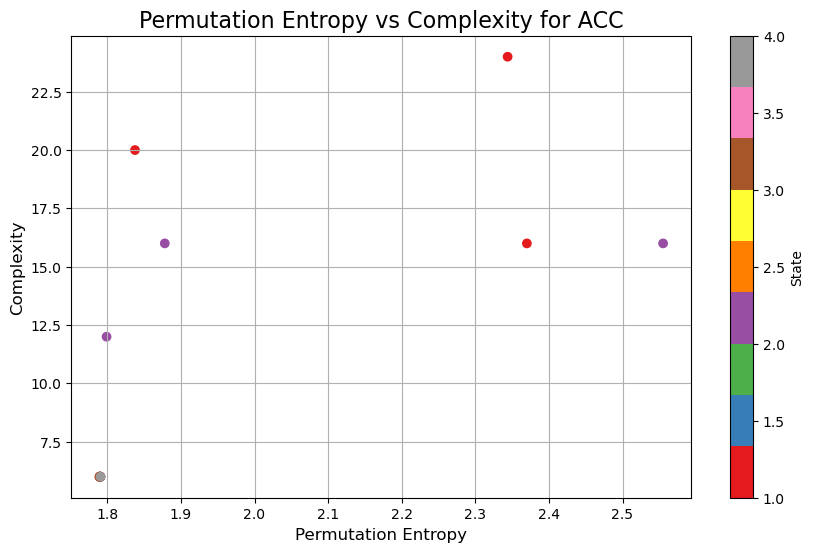

Unique states for ECG: [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


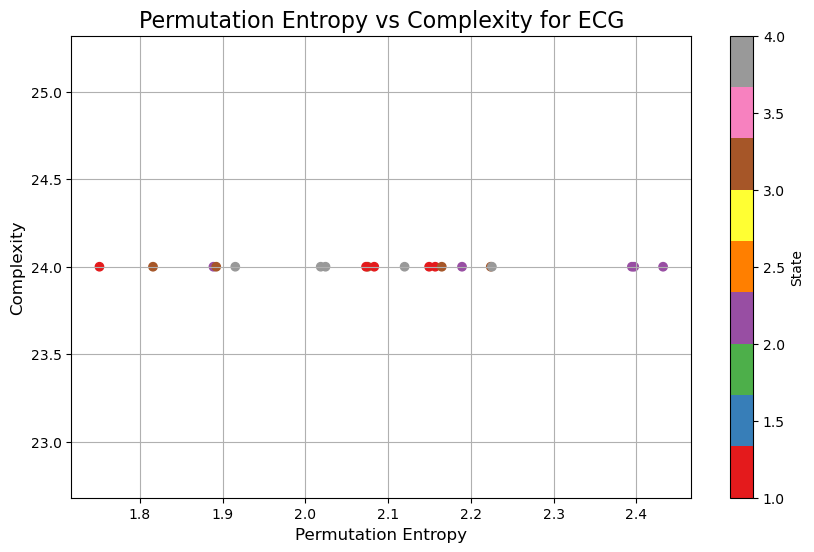

Unique states for EDA: [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


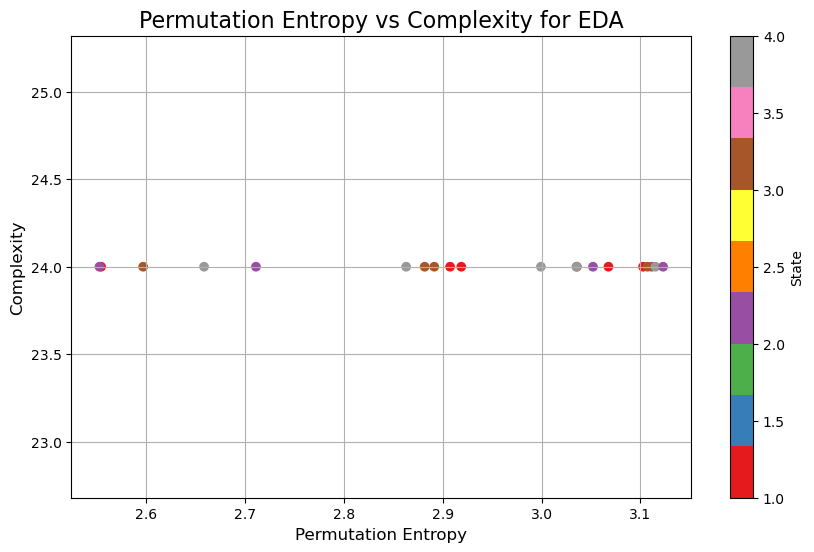

Unique states for EMG: [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


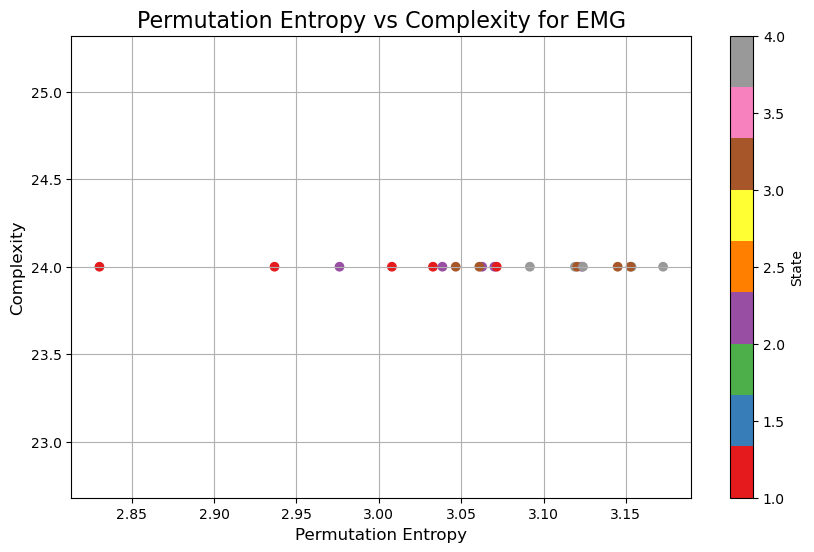

Unique states for RESP: [], Categories (4, int64): [1, 2, 3, 4]


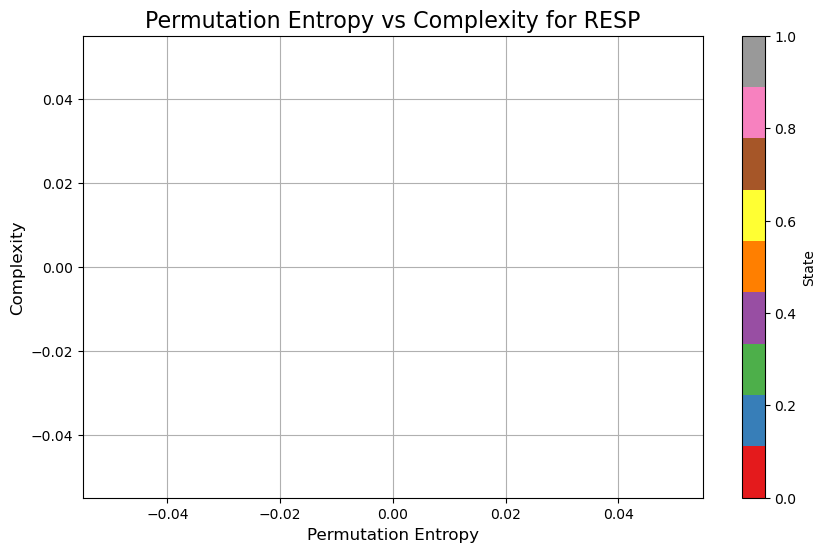

Unique states for TEMP: [], Categories (4, int64): [1, 2, 3, 4]


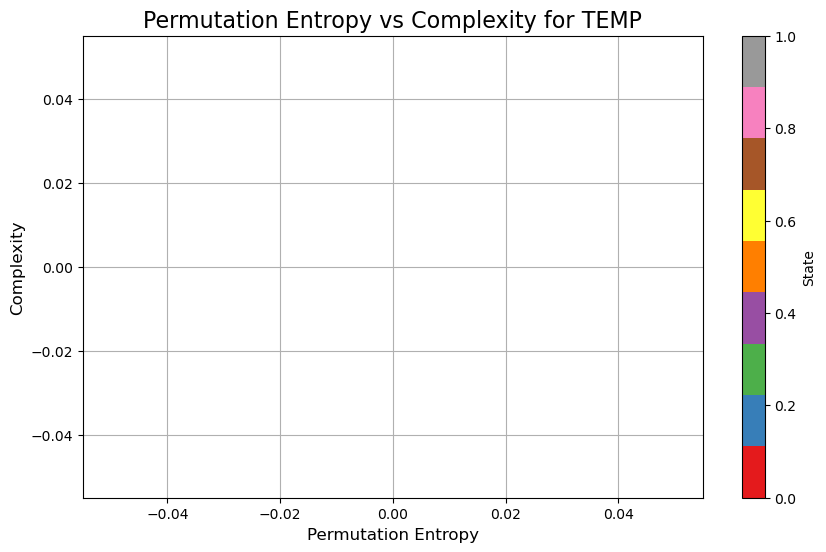

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

df_entropy_complexity["State"] = df_entropy_complexity["State"].astype("category")

def plot_entropy_complexity(df, modality):
    modality_data = df[df["Modality"] == modality]

    print(f"Unique states for {modality}: {modality_data['State'].unique()}")

    plt.figure(figsize=(10, 6))
    plt.scatter(modality_data["Permutation Entropy"], modality_data["Complexity"], c=modality_data["State"], cmap='Set1')
    plt.colorbar(label="State")

    plt.title(f"Permutation Entropy vs Complexity for {modality}", fontsize=16)
    plt.xlabel("Permutation Entropy", fontsize=12)
    plt.ylabel("Complexity", fontsize=12)
    plt.grid(True)
    plt.show()

modalities = ["ACC", "ECG", "EDA", "EMG", "RESP", "TEMP"]

for modality in modalities:
    plot_entropy_complexity(df_entropy_complexity, modality)
